# TALLER 1

1. Seleccione al menos 4 conjuntos de datos y realice un perfilamiento de
cada uno. Describa los hallazgos encontrados en cada conjunto de datos. No
olvide mencionar su estructura y aspectos relevantes de calidad como campos
nulos, departamentos mal escritos, formatos de fechas incorrectos, entre otros.
Si no evidencia ningún problema de calidad de datos, también mencionelo.

In [1]:
# Importing required libraries

import re
from random import randint
from datetime import datetime

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylev
import seaborn as sbn

In [2]:
# Parameter for showing all columns when printing a dataframe
pd.set_option('display.max_columns', None)

In [3]:
dane_df=pd.read_csv('./data/Dane.csv')

In [4]:
dane_df.dtypes

CODIGO DANE      int64
DEPARTAMENTO    object
MUNICIPIO       object
dtype: object

In [85]:
dane_df.head()

,CODIGO DANE,DEPARTAMENTO,MUNICIPIO
0,99,OTRO,NO RESIDENTE EN EL PAIS
1,5001,ANTIOQUIA,MEDELLIN
2,5002,ANTIOQUIA,ABEJORRAL
3,5004,ANTIOQUIA,ABRIAQUI
4,5021,ANTIOQUIA,ALEJANDRIA


In [11]:
# Loading data
terrorismo_df = pd.read_csv("./data/terrorismo.csv")

In [12]:
terrorismo_df.shape

(3954, 6)

In [86]:
terrorismo_df.head(5)

,DEPARTAMENTO,MUNICIPIO,CODIGO DANE,ARMAS MEDIOS,FECHA HECHO,CANTIDAD
0,PUTUMAYO,MOCOA,86001,ARTEFACTO EXPLOSIVO/CARGA DINAMITA,2010-01-05,1
1,ARAUCA,TAME,81794,ARTEFACTO INCENDIARIO,2010-01-06,1
2,META,VILLAVICENCIO,50001,GRANADA DE MANO,2010-01-06,1
3,ARAUCA,FORTUL,81300,CILINDRO BOMBA,2010-01-07,1
4,META,URIBE,50370,MINA ANTIPERSONA,2010-01-11,1


In [14]:
terrorismo_df.dtypes
#Se necesita corregir formato de fecha 

Departamento    object
Municipio       object
CODIGO DANE      int64
ARMAS MEDIOS    object
FECHA HECHO     object
CANTIDAD         int64
dtype: object

In [15]:
def error_in_format(x):
    try:
        datetime.strptime(x, "%d/%m/%Y")
        return False
    except:
        return True
terrorismo_df.loc[terrorismo_df["FECHA HECHO"].apply(error_in_format)]

,Departamento,Municipio,CODIGO DANE,ARMAS MEDIOS,FECHA HECHO,CANTIDAD


In [16]:
dateparse = lambda x: datetime.strptime(x, "%d/%m/%Y")

In [18]:
terrorismo_df["FECHA HECHO"]=terrorismo_df["FECHA HECHO"].apply(dateparse)

In [13]:
homicidios_df.dtypes

DEPARTAMENTO                    object
MUNICIPIO                       object
CODIGO DANE                      int64
ARMAS MEDIOS                    object
FECHA HECHO             datetime64[ns]
GENERO                          object
GRUPO ETARÍO                    object
DESCRIPCIÓN CONDUCTA            object
CANTIDAD                         int64
dtype: object

In [19]:
terrorismo_df.head()

,Departamento,Municipio,CODIGO DANE,ARMAS MEDIOS,FECHA HECHO,CANTIDAD
0,PUTUMAYO,MOCOA (CT),86001000,ARTEFACTO EXPLOSIVO/CARGA DINAMITA,2010-01-05,1
1,ARAUCA,TAME,81794000,ARTEFACTO INCENDIARIO,2010-01-06,1
2,META,VILLAVICENCIO (CT),50001000,GRANADA DE MANO,2010-01-06,1
3,ARAUCA,FORTUL,81300000,CILINDRO BOMBA,2010-01-07,1
4,META,URIBE,50370000,MINA ANTIPERSONA,2010-01-11,1


In [21]:
#Corrección formato DANE 
def fix_dane_lengh(x) :
    x=str(x)
    x=x[:-3]
    return int(x)

In [22]:
terrorismo_df['CODIGO DANE']=terrorismo_df['CODIGO DANE'].apply({fix_dane_lengh})
terrorismo_df['FECHA HECHO']=pd.to_datetime(terrorismo_df['FECHA HECHO'])

In [27]:
terrorismo_df.head(5)


,Departamento,Municipio,CODIGO DANE,ARMAS MEDIOS,FECHA HECHO,CANTIDAD
0,PUTUMAYO,MOCOA (CT),86001,ARTEFACTO EXPLOSIVO/CARGA DINAMITA,2010-01-05,1
1,ARAUCA,TAME,81794,ARTEFACTO INCENDIARIO,2010-01-06,1
2,META,VILLAVICENCIO (CT),50001,GRANADA DE MANO,2010-01-06,1
3,ARAUCA,FORTUL,81300,CILINDRO BOMBA,2010-01-07,1
4,META,URIBE,50370,MINA ANTIPERSONA,2010-01-11,1


In [65]:
for z in range (0,len(terrorismo_df)):
    for y in range (0,len(dane_df)):
        if terrorismo_df['CODIGO DANE'][z]==dane_df['CODIGO DANE'][y]:
            terrorismo_df['MUNICIPIO'][z]=dane_df['MUNICIPIO'][y]
            terrorismo_df['DEPARTAMENTO'][z]=dane_df['DEPARTAMENTO'][y]
                                                


C:\Users\Sebastian\AppData\Local\Temp\ipykernel_30304\2050612406.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  terrorismo_df['MUNICIPIO'][z]=dane_df['MUNICIPIO'][y]
C:\Users\Sebastian\AppData\Local\Temp\ipykernel_30304\2050612406.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  terrorismo_df['DEPARTAMENTO'][z]=dane_df['DEPARTAMENTO'][y]


In [66]:
terrorismo_df.head(5)

,DEPARTAMENTO,MUNICIPIO,CODIGO DANE,ARMAS MEDIOS,FECHA HECHO,CANTIDAD
0,PUTUMAYO,MOCOA,86001,ARTEFACTO EXPLOSIVO/CARGA DINAMITA,2010-01-05,1
1,ARAUCA,TAME,81794,ARTEFACTO INCENDIARIO,2010-01-06,1
2,META,VILLAVICENCIO,50001,GRANADA DE MANO,2010-01-06,1
3,ARAUCA,FORTUL,81300,CILINDRO BOMBA,2010-01-07,1
4,META,URIBE,50370,MINA ANTIPERSONA,2010-01-11,1


In [67]:
terrorismo_df['ARMAS MEDIOS'].unique()
#Se encuentra una categoría "-" Se procede a cambiar por NO REPORTADO

array(['ARTEFACTO EXPLOSIVO/CARGA DINAMITA', 'ARTEFACTO INCENDIARIO',
       'GRANADA DE MANO', 'CILINDRO BOMBA', 'MINA ANTIPERSONA',
       'COMBUSTIBLE', 'OLLA BOMBA', 'PAQUETE BOMBA', 'NO REPORTADO',
       'PETARDO PLANFETARIO', 'CARRO BOMBA', 'PERSONA BOMBA', 'ROCKET',
       'BICICLETA BOMBA', 'CANTINA BOMBA', 'CABALLO BOMBA', 'MOTO BOMBA',
       'GRANADA DE FUSIL', 'GRANADA DE MORTERO', 'ARMA DE FUEGO',
       'LANCHA BOMBA', 'CASA BOMBA', 'BALON BOMBA', 'PAPA EXPLOSIVA',
       'BURRO BOMBA', 'CARTA BOMBA', 'SIN EMPLEO DE ARMAS',
       'ARMA BLANCA / CORTOPUNZANTE', 'CONTUNDENTES', 'DIRECTA',
       'PERRO BOMBA'], dtype=object)

In [68]:
terrorismo_df["ARMAS MEDIOS"].loc[terrorismo_df["ARMAS MEDIOS"]=="-"]="NO REPORTADO"

C:\Users\Sebastian\AppData\Local\Temp\ipykernel_30304\1706169736.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  terrorismo_df["ARMAS MEDIOS"].loc[terrorismo_df["ARMAS MEDIOS"]=="-"]="NO REPORTADO"


In [44]:
#SE CORRIGE NOMBRE DE COLUMNA MUNICIPIO Y DEPARTAMENTO A MAYUSCULAS 
terrorismo_df=terrorismo_df.rename({'Departamento': 'DEPARTAMENTO', 'Municipio': 'MUNICIPIO'}, axis=1)

In [69]:
terrorismo_df['MUNICIPIO'].unique()

array(['MOCOA', 'TAME', 'VILLAVICENCIO', 'FORTUL', 'URIBE', 'PUERTO RICO',
       'BUENAVENTURA', 'ARAUQUITA', 'BARRANCAS', 'MEDELLIN', 'IBAGUÉ',
       'GRANADA', 'MESETAS', 'URRAO', 'NEIVA', 'SARAVENA',
       'SANTANDER DE QUILICHAO', 'PUERTO ASÍS', 'GUADALUPE', 'CAUCASIA',
       'ONZAGA', 'PITALITO', 'SAMANIEGO', 'BELLO',
       'SAN JOSÉ DEL GUAVIARE', 'VILLAVIEJA', 'SABANA DE TORRES',
       'ARAUCA', 'CALI', 'VILLANUEVA', 'PURACÉ', 'SARDINATA', 'TIBÚ',
       'CHAPARRAL', 'TÁMARA', 'PUERTO GUZMÁN', 'VISTA HERMOSA',
       'EL TARRA', 'CRAVO NORTE', 'ROVIRA', 'DAGUA', 'MONTELÍBANO',
       'EL CHARCO', 'PEREIRA', 'SOCOTÁ', 'FLORIDA', 'RIOHACHA',
       'CONVENCIÓN', 'HACARÍ', 'EL CASTILLO', 'LÍBANO', 'CIÉNAGA',
       'MANIZALES', 'PASTO', 'PUERTO LLERAS', 'TEORAMA', 'TARAZA',
       'CORINTO', 'GUAPI', 'LA APARTADA', 'DIBULLA', 'EL PAUJIL',
       'SAN ANDRES', 'TOLEDO', 'TADÓ', 'TIERRALTA', 'PUERTO CAICEDO',
       'PIENDAMÓ', 'EL TAMBO', 'BOGOTÁ D.C.', 'POPAYÁN', 'VALDIVIA',


In [70]:
terrorismo_df['DEPARTAMENTO'].unique()
#No se encuentran departamentos mal escritos

array(['PUTUMAYO', 'ARAUCA', 'META', 'VALLE DEL CAUCA', 'LA GUAJIRA',
       'ANTIOQUIA', 'TOLIMA', 'HUILA', 'CAUCA', 'SANTANDER', 'NARIÑO',
       'GUAVIARE', 'NORTE DE SANTANDER', 'CASANARE', 'CÓRDOBA',
       'RISARALDA', 'BOYACA', 'MAGDALENA', 'CALDAS', 'CAQUETÁ', 'CHOCÓ',
       'BOGOTA D.C.', 'ATLANTICO', 'QUINDIO', 'CESAR', 'BOLIVAR',
       'VICHADA', 'AMAZONAS', 'CUNDINAMARCA', 'SUCRE', 'CORDOBA'],
      dtype=object)

In [71]:
terrorismo_df.isnull().sum()
#No se encuentran datos nulos

DEPARTAMENTO    0
MUNICIPIO       0
CODIGO DANE     0
ARMAS MEDIOS    0
FECHA HECHO     0
CANTIDAD        0
dtype: int64

In [73]:
terrorismo_df.loc[terrorismo_df['ARMAS MEDIOS']=="NO REPORTADO"]['ARMAS MEDIOS'].value_counts()

NO REPORTADO    184
Name: ARMAS MEDIOS, dtype: int64

2.Responda la siguientes preguntas para cada uno de los conjuntos de
datos seleccionados:

    a.¿Cuáles han sido los departamentos (TOP 3) más afectados en términos de cantidad de delitos cometidos en los últimos 5 años?

In [87]:
last5_df=terrorismo_df.loc[terrorismo_df['FECHA HECHO']>'2017-01-01']

In [143]:
#Se utiliza la función groupby 
last5_df.groupby(['DEPARTAMENTO'])[['CANTIDAD']].sum().sort_values(by="CANTIDAD", ascending= False).head(3)

,CANTIDAD
DEPARTAMENTO,
ANTIOQUIA,241
ARAUCA,173
NORTE DE SANTANDER,172


In [76]:
last5_df.groupby(last5_df["FECHA HECHO"].dt.year).agg({"GENERO":"count"})

KeyError: "Column(s) ['GENERO'] do not exist"

    b.Para los casos en los que aplique, ¿cuál ha sido el arma o medio más común para cometer el delito?

In [144]:
terrorismo_df['ARMAS MEDIOS'].value_counts().head(1)

ARTEFACTO EXPLOSIVO/CARGA DINAMITA    1638
Name: ARMAS MEDIOS, dtype: int64

c.Para los casos en los que aplique, ¿cómo ha sido la proporción de géneros y grupos etarios que han estado involucrados en este tipo de delito? ¿Han variado con el paso de los años?

In [ ]:
#NO APLICA

d.¿Se evidencia alguna tendencia para cometer dicho delito en algún
mes particular del año?

<AxesSubplot:xlabel='MES DEL AÑO'>

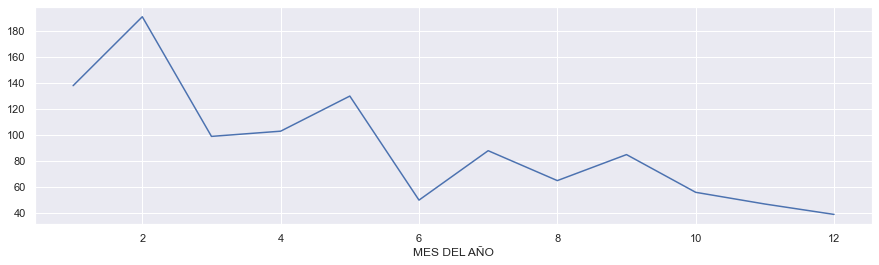

In [78]:
sbn.set(rc={'figure.figsize':(15, 4)})
last5_df.groupby(last5_df["FECHA HECHO"].dt.month)['CANTIDAD'].count().plot(xlabel="MES DEL AÑO")
#En los ultimos 5 años el mes con más delitos fue FEBRERO

In [145]:
last5_df.groupby(last5_df["FECHA HECHO"].dt.month)['CANTIDAD'].count()

FECHA HECHO
1     138
2     191
3      99
4     103
5     130
6      50
7      88
8      65
9      85
10     56
11     47
12     39
Name: CANTIDAD, dtype: int64

Para los casos en los que se disponga del detalle del delito o de una
descripción, como por ejemplo en delitos sexuales y secuestro, ¿cuáles
son las descripciones o modalidades más comunes?

In [58]:
#NO APLICA


In [140]:
terrorismo_df.to_csv('Terrorismo_BK.csv')

In [142]:
terrorismo_df

,DEPARTAMENTO,MUNICIPIO,CODIGO DANE,ARMAS MEDIOS,FECHA HECHO,CANTIDAD
0,PUTUMAYO,MOCOA,86001,ARTEFACTO EXPLOSIVO/CARGA DINAMITA,2010-01-05,1
1,ARAUCA,TAME,81794,ARTEFACTO INCENDIARIO,2010-01-06,1
2,META,VILLAVICENCIO,50001,GRANADA DE MANO,2010-01-06,1
3,ARAUCA,FORTUL,81300,CILINDRO BOMBA,2010-01-07,1
4,META,URIBE,50370,MINA ANTIPERSONA,2010-01-11,1
...,...,...,...,...,...,...
3949,NORTE DE SANTANDER,TIBÚ,54810,SIN EMPLEO DE ARMAS,2022-01-20,1
3950,NORTE DE SANTANDER,TIBÚ,54810,SIN EMPLEO DE ARMAS,2022-01-21,1
3951,NORTE DE SANTANDER,TIBÚ,54810,SIN EMPLEO DE ARMAS,2022-01-27,1
3952,NORTE DE SANTANDER,TIBÚ,54810,SIN EMPLEO DE ARMAS,2022-02-23,1
